In [1]:
from bucket_model import BucketModel
from bucket_model_optimizer import BucketModelOptimizer
from data_preprocessor import preprocess_data

from bucket_model_plotter import plot_water_balance, plot_Q_Q, plot_ECDF, plot_KDE, plot_monthly_boxplot, plot_timeseries

import pandas as pd

In [2]:
path_to_file = '/Users/cooper/Desktop/bucket-model/data/GSTEIGmeteo.txt'
output_destination = '/Users/cooper/Desktop/BucketModel/data/GSTEIGmeteo.csv'
catchment_area = 384.2 # km^2
training_data = preprocess_data(path_to_file=path_to_file, catchment_area=catchment_area)


training_data

,day,P_mix,T_max,T_min,Q
date,,,,,
1986-01-01,1,2.5,-2.5,-11.6,0.512733
1986-01-02,2,0.2,2.6,-10.7,0.537470
1986-01-03,3,4.3,2.2,-5.3,0.532972
1986-01-04,4,3.4,-4.0,-12.9,0.526226
1986-01-05,5,3.6,1.9,-13.3,0.526226
...,...,...,...,...,...
2000-09-26,270,0.0,16.3,5.8,3.215825
2000-09-27,271,0.0,15.6,5.3,3.238313
2000-09-28,272,0.0,14.1,6.0,3.238313


In [3]:
# Initialize the BucketModel with initial parameter guesses
bucket = BucketModel(0.5, 20, 0.14, 15.15)  # k, S_max, fr, rg, 
bucket.set_catchment_properties(0.5/100, 1638, 2035, 0, 46.9)

# Initialize the BucketModelOptimizer with the BucketModel instance and observed data
optimizer = BucketModelOptimizer(model=bucket, training_data=training_data)

# Optionally, set additional optimization options, like optimization method, parameter bounds, etc.
optimizer.set_options(method='local', bounds={'k': (0.1, 1), 'S_max': (10, 50), 'fr': (0.1, 0.3), 'rg': (10, 20)})

In [4]:
# Run the optimization to calibrate the model parameters
calibrated_parameters = optimizer.calibrate()

In [5]:
calibrated_parameters

{'k': 0.4121746945950158,
 'S_max': 20.46351725879923,
 'fr': 0.22517906421395364,
 'rg': 17.112698393178906}

In [6]:
bucket.update_parameters(parameters=calibrated_parameters)
bucket

BucketModel(k=0.4121746945950158, S_max=20.46351725879923, fr=0.22517906421395364, rg=17.112698393178906)

In [7]:
results = bucket.run(training_data)

In [8]:
results

,ET,Q_s,Q_gw,Snow_accum,S,S_gw,Snow_melt,Rain,Snow,Precip
date,,,,,,,,,,
1986-01-01,0.172563,0.000000,5.291761,273.155109,20.290954,85.264542,0.000000,0.000000,2.500000,2.5
1986-01-02,0.214296,0.000000,4.982531,273.345861,20.085906,80.282012,0.000000,0.009248,0.190752,0.2
1986-01-03,0.254972,0.000000,4.691371,277.522594,19.954201,75.590641,0.000000,0.123267,4.176733,4.3
1986-01-04,0.153134,0.000000,4.417225,280.922594,19.801067,71.173416,0.000000,0.000000,3.400000,3.4
1986-01-05,0.187517,0.000000,4.159100,284.522594,19.613551,67.014316,0.000000,0.000000,3.600000,3.6
...,...,...,...,...,...,...,...,...,...,...
2000-09-26,1.166338,0.841351,4.515596,282.797776,20.463517,74.487116,3.736364,0.000000,0.000000,0.0
2000-09-27,1.111294,0.785663,4.352739,279.308717,20.463517,71.726478,3.489059,0.000000,0.000000,0.0
2000-09-28,1.072360,0.748538,4.191418,275.984528,20.463517,69.038351,3.324189,0.000000,0.000000,0.0


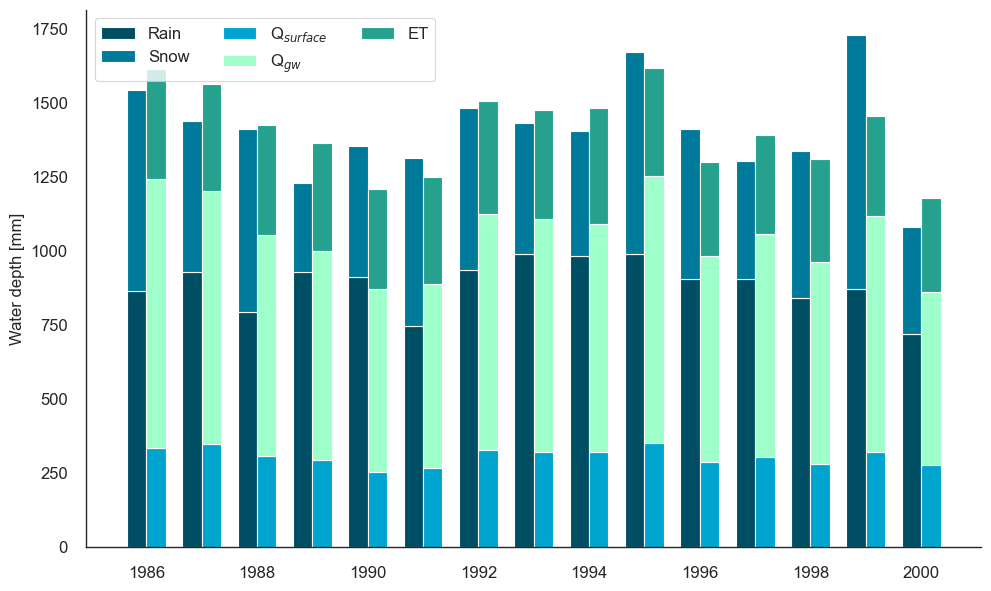

In [9]:
plot_water_balance(results)


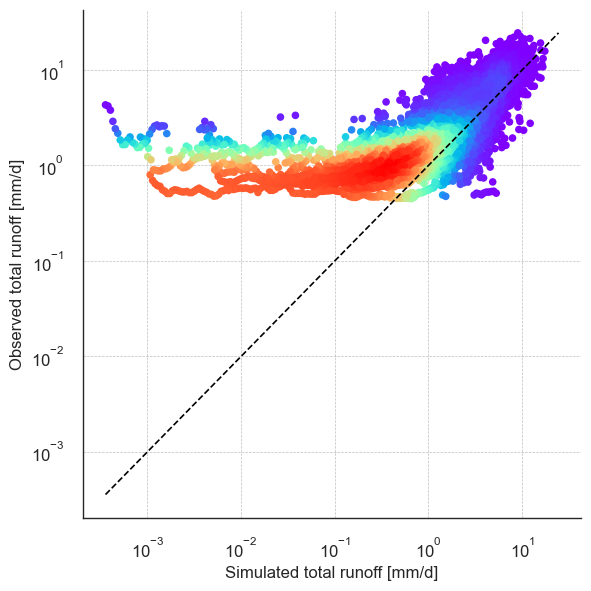

In [10]:
plot_Q_Q(results=results, validation=training_data, kde=True)

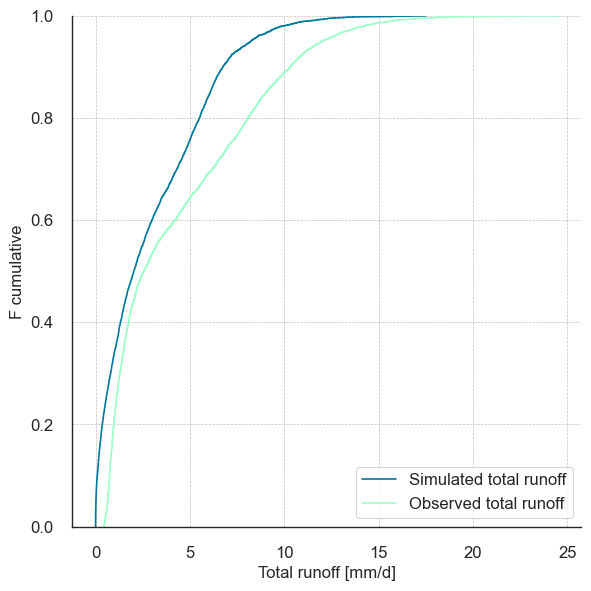

In [11]:
plot_ECDF(results=results, validation=training_data)

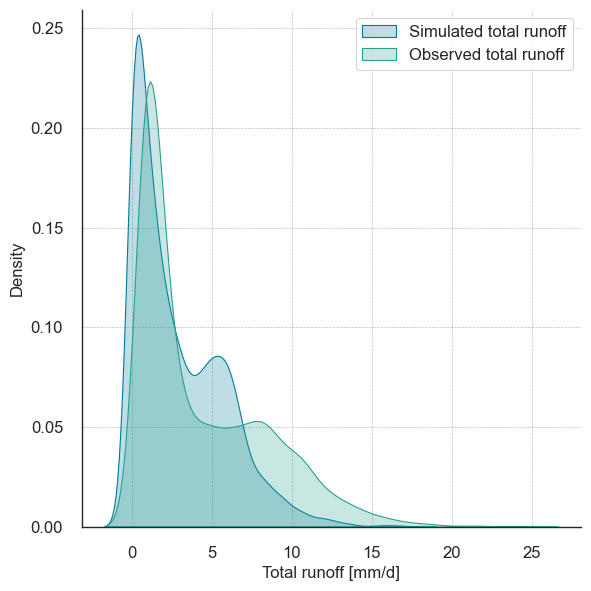

In [12]:
plot_KDE(results=results, validation=training_data)

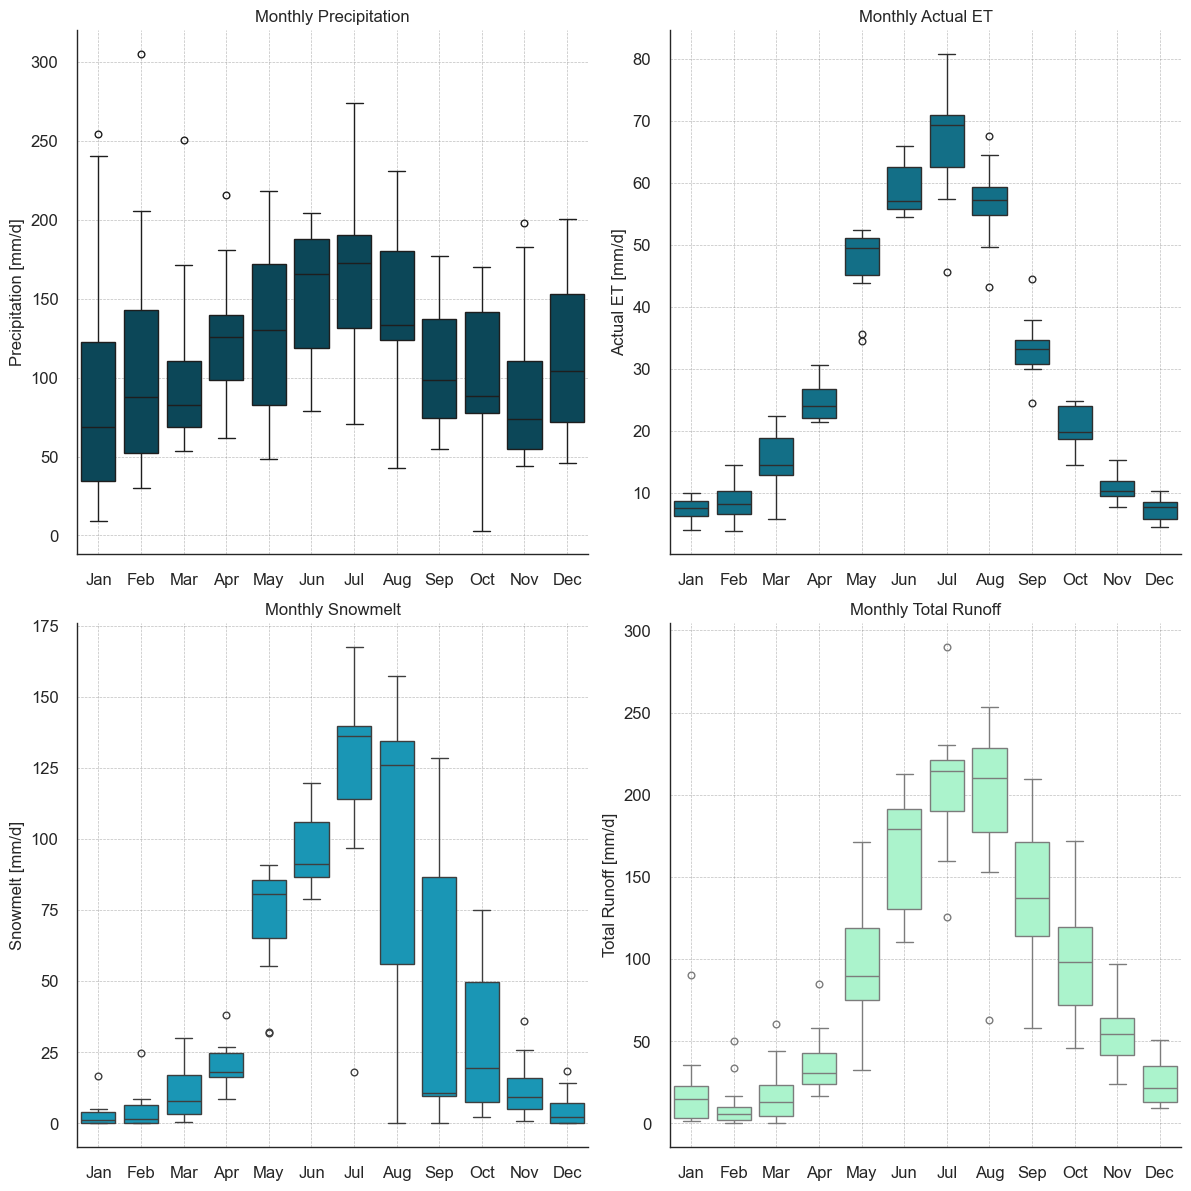

In [13]:
plot_monthly_boxplot(results=results)

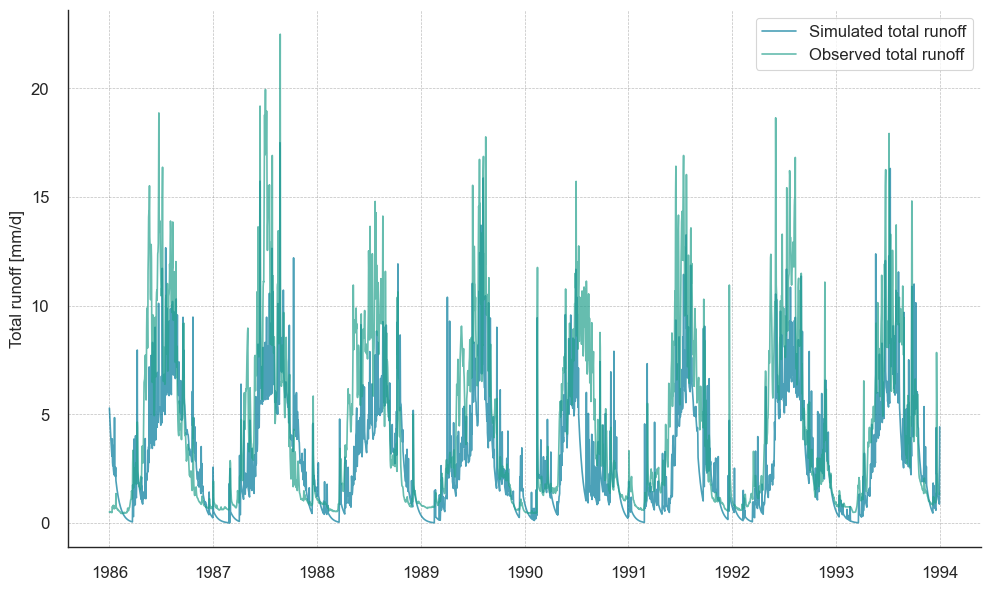

In [14]:
plot_timeseries(results=results, validation=training_data, start_year='1986', end_year='1993')

/Users/cooper/Desktop/bucket-model/bucket_model_plotter.py:342: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  results_filtered = results_filtered.resample('M').sum()
/Users/cooper/Desktop/bucket-model/bucket_model_plotter.py:343: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  validation_filtered = validation_filtered.resample('M').sum()


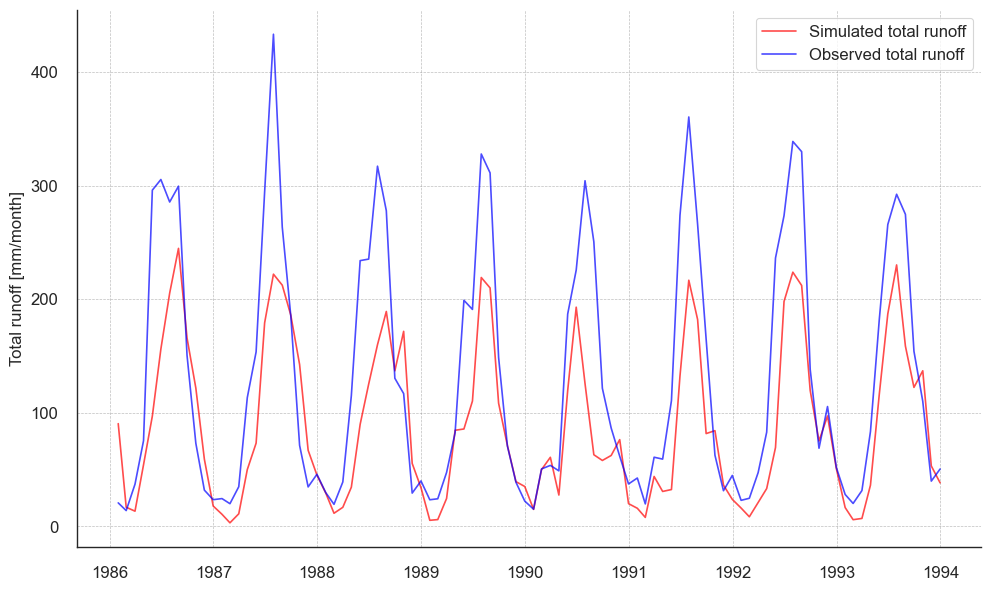

In [15]:
plot_timeseries(results=results, validation=training_data, start_year='1986', end_year='1993', monthly=True, palette=['red', 'blue'])